# Lab 4-25-22_Start

## Part I: Visualization of Qualitative data

In [ ]:
import requests 
import pandas as pd

secret = '***********'
#headers = {apiKey: '*******'}
query_params = {
      'q': "metaverse",
      'pageSize': 50,
      'apiKey': secret
}
main_url = 'https://newsapi.org/v2/everything?'
 
# fetching data in json format
res = requests.get(main_url, params=query_params)
result_page = res.json()
 
# getting all articles in a string article
article = result_page["articles"]
 
# empty list to hold all trending news
art_num = []
art_title = []
art_nchar = []
art_nword= []
     
for ar in article:
    art_title.append(ar["title"])

# printing all trending news       
for i in range(len(art_title)):            
    art_num.append(i + 1)
    art_nchar.append(len(art_title[i]))
    art_nword.append(len(art_title[i].split()))

newsdf = pd.DataFrame()
newsdf['Num'] = art_num
newsdf['Title'] = art_title
newsdf['Nchar'] = art_nchar
newsdf['Nword'] = art_nword
newsdf

In [ ]:
!pip install WordCloud

In [ ]:
#Source: https://www.datacareer.de/blog/accessing-the-news-api-in-python/

#Code to create a word cloud with the headlines
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#create an empty string
text_combined = ''
for ar in result_page["articles"]:
    text_combined += ar['title'] + ' '

#Print the first 300 characters to screen for inspection
print(text_combined[0:300])

In [ ]:
wordcloud = WordCloud(max_font_size=40).generate(text_combined)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Part II: Visualization of Quantitative Data

In [1]:
#Source: https://realpython.com/pandas-plot-python/
import pandas as pd

d_url = ("https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv")
df = pd.read_csv(d_url)
pd.set_option("display.max.columns", None)
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [6]:
df.shape

(173, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [8]:
%matplotlib inline

<AxesSubplot:xlabel='Rank'>

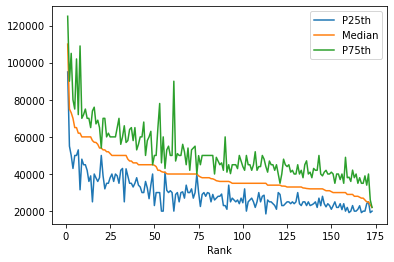

In [9]:
#Show the distribution of earnings graphically
df.plot(x="Rank", y=["P25th", "Median", "P75th"])

In [ ]:
#Survey your data by creating a histogram for the median column
median_column = df["Median"]
median_column.plot(kind="hist")

In [ ]:
#Analysis of outliers
top_5 = df.sort_values(by="Median", ascending=False).head()
top_5.plot(x="Major", y="Median", kind="bar", rot=5, fontsize=4)